In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visão Geral

In [29]:
df = pd.read_csv('biased_leukemia_dataset.csv')
display(df)

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,...,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,...,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,...,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,...,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,...,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143189,143190,11,Male,Argentina,7525,5.30,240260,12.8,74,No,...,No,No,Yes,25.5,No,No,Ethnic_Group_A,Medium,Urban,Negative
143190,143191,77,Female,China,7258,4.48,317102,13.4,51,No,...,Yes,No,No,27.5,No,No,Ethnic_Group_C,Low,Rural,Negative
143191,143192,22,Female,USA,6321,4.94,300353,10.3,56,No,...,No,No,No,22.7,No,No,Ethnic_Group_C,Medium,Rural,Negative
143192,143193,14,Female,India,8039,5.45,237054,11.9,70,No,...,No,No,No,21.8,Yes,No,Ethnic_Group_A,Medium,Urban,Negative


In [30]:
display(df.describe())

,Patient_ID,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.00000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,71597.50000,44.945200,7001.289879,4.998193,249933.012137,13.498334,49.547984,24.990679
std,41336.69156,25.737805,2007.444410,0.500298,49842.308243,1.996714,28.837607,4.999786
min,1.00000,1.000000,-1602.000000,2.940000,46069.000000,4.700000,0.000000,2.800000
25%,35799.25000,23.000000,5644.250000,4.660000,216372.000000,12.100000,25.000000,21.600000
50%,71597.50000,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,107395.75000,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,143194.00000,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


In [31]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

None

# Tratamento / Limpeza

In [32]:
media_wbc = df[df['WBC_Count'] >= 0]['WBC_Count'].median()
df['WBC_Count'] = df['WBC_Count'].apply(lambda x: media_wbc if x < 0 else x)

In [33]:
media_Bone = df[df['Bone_Marrow_Blasts'] >= 0]['Bone_Marrow_Blasts'].median()
df['Bone_Marrow_Blasts'] = df['Bone_Marrow_Blasts'].apply(lambda x: media_Bone if x <= 0 else x)

In [34]:
display(df.describe())

,Patient_ID,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.00000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,71597.50000,44.945200,7002.493275,4.998193,249933.012137,13.498334,50.043116,24.990679
std,41336.69156,25.737805,2005.191596,0.500298,49842.308243,1.996714,28.408682,4.999786
min,1.00000,1.000000,16.000000,2.940000,46069.000000,4.700000,1.000000,2.800000
25%,35799.25000,23.000000,5646.000000,4.660000,216372.000000,12.100000,26.000000,21.600000
50%,71597.50000,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,107395.75000,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,143194.00000,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


# Análise

In [ ]:
df_leukemia = df.groupby('Leukemia_Status').agg('Patient_ID').count()
display(df_leukemia)

Leukemia_Status
Negative    121797
Positive     21397
Name: Patient_ID, dtype: int64

C:\Users\João\AppData\Local\Temp\ipykernel_10768\3214936718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Leukemia_Status', data=df, palette='Set1')


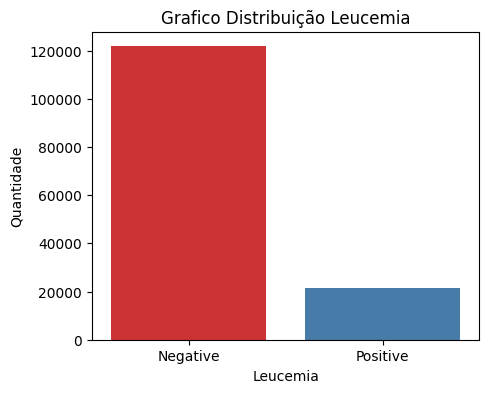

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Leukemia_Status', data=df, palette='Set1')
plt.title('Leukemia Status')
plt.xlabel('Leukemia')
plt.ylabel('Amount')
plt.show()

## Idade

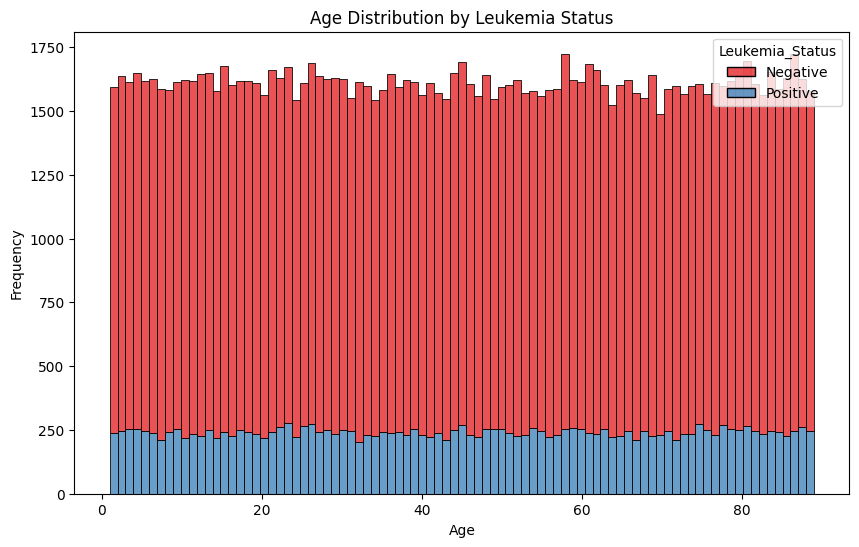

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Leukemia_Status', multiple='stack', bins=89, palette='Set1')
plt.title('Age VS Leukemia')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

In [81]:
def category_age(age):
  if age < 13:
    return 'Children'
  elif 13 <= age < 18:
    return 'Teenager'
  elif 18 <= age < 65:
    return 'Adult'
  else:
    return 'Elderly'
  
df["Category_Age"] = df["Age"].apply(category_age)

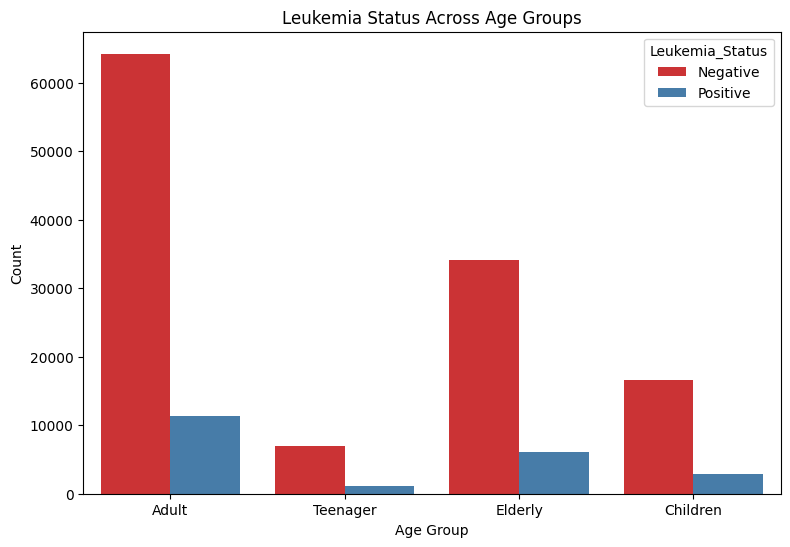

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Category_Age', hue='Leukemia_Status', data=df, palette='Set1')
plt.title('Category Age VS Leukemia Status')
plt.xlabel('Category Age')
plt.ylabel('Count')
plt.show()

## Genero

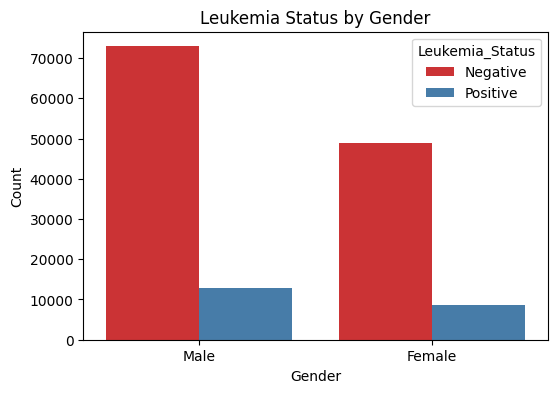

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Leukemia_Status', data=df, palette='Set1')
plt.title('Leukemia Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## País

In [50]:
country_bias = df['Country'].value_counts(normalize=True) * 100
print("\nCountry Distribution (% of Total):\n", country_bias)


Country Distribution (% of Total):
 Country
India           16.120089
USA             15.906393
Brazil          10.637317
Russia          10.626842
China           10.577957
UK               2.210288
Mexico           2.206796
Turkey           2.183052
South Korea      2.145341
Canada           2.142548
Australia        2.139056
Sweden           2.137659
South Africa     2.134866
Netherlands      2.126486
Japan            2.104837
Norway           2.099250
Argentina        2.095758
France           2.095060
Germany          2.086680
Saudi Arabia     2.078299
Italy            2.076204
Spain            2.069221
Name: proportion, dtype: float64


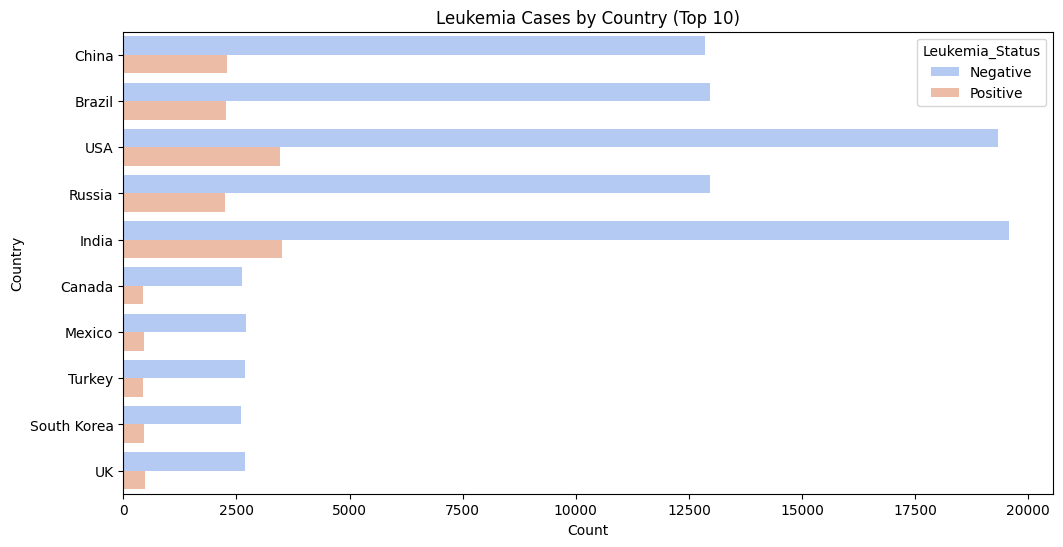

In [38]:
top_countries = df['Country'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='Leukemia_Status', data=df[df['Country'].isin(top_countries)], palette='coolwarm')
plt.title('Leukemia Cases by Country (Top 10)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## Glóbulos brancos

## Glóbulos Vermelhos

## Contagem de Plaquetas

## Nível de hemoglobina

## Explosões de Medula Óssea

## Mutação genética

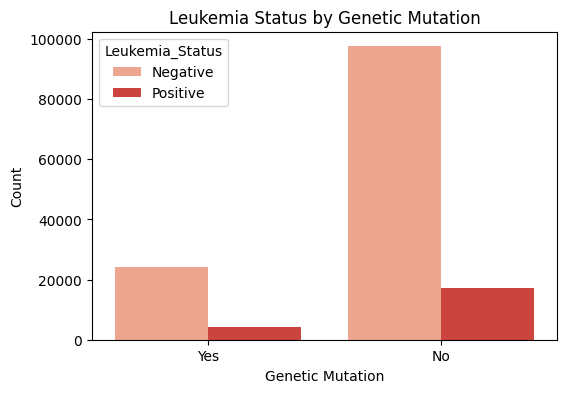

In [39]:
plt.subplots(figsize=(6, 4))
sns.countplot(x='Genetic_Mutation', hue='Leukemia_Status', data=df, palette='Reds')
plt.title('Leukemia Status by Genetic Mutation')
plt.xlabel('Genetic Mutation')
plt.ylabel('Count')
plt.show()

## Histórico familiar

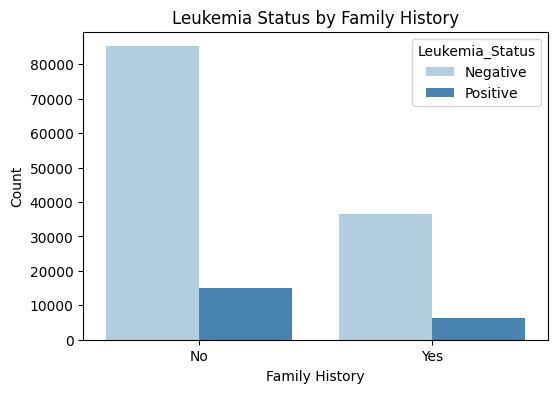

In [40]:
plt.subplots(figsize=(6, 4))
sns.countplot(x='Family_History', hue='Leukemia_Status', data=df, palette='Blues')
plt.title('Leukemia Status by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

## Status de tabagismo

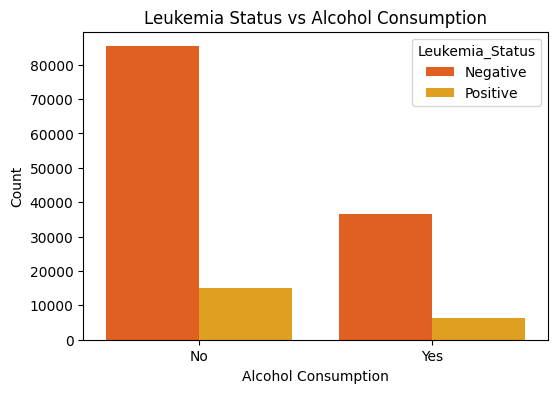

In [41]:
plt.subplots(figsize=(6, 4))
sns.countplot(x='Alcohol_Consumption', hue='Leukemia_Status', data=df, palette='autumn')
plt.title('Leukemia Status vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

## Consumo de álcool

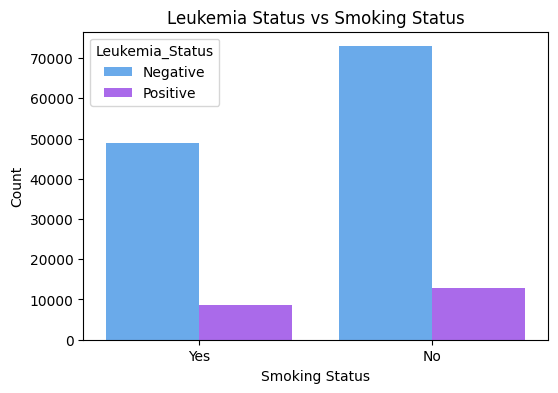

In [42]:
plt.subplots(figsize=(6, 4))
sns.countplot(x='Smoking_Status', hue='Leukemia_Status', data=df, palette='cool')
plt.title('Leukemia Status vs Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

## Exposição à radiação

## Histórico de infecção

## Índice de massa corporal

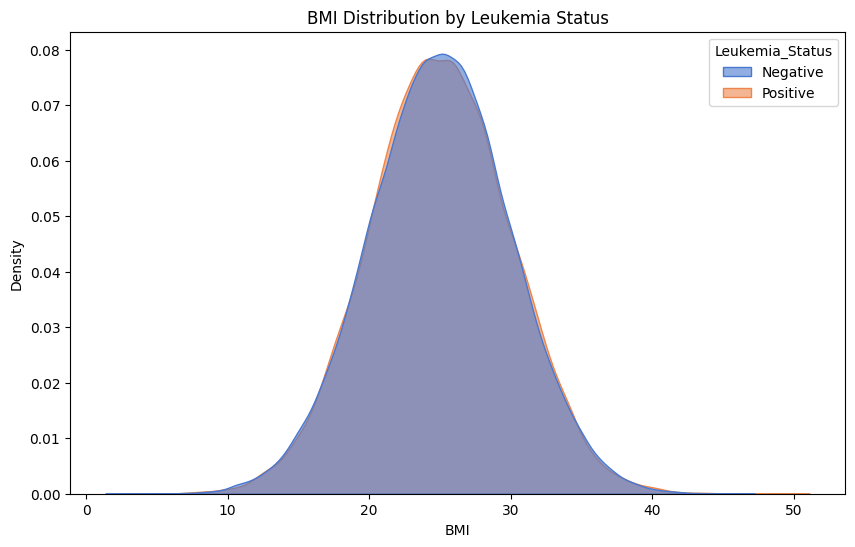

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='Leukemia_Status', fill=True, common_norm=False, palette='muted', alpha=0.6)
plt.title('BMI Distribution by Leukemia Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


## Doença crônica 

## Distúrbios imunológicos

## Etnia

## Status Socioeconômico

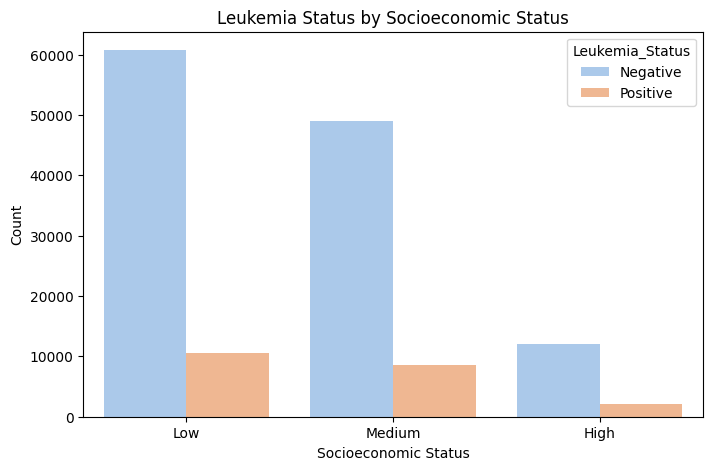

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Socioeconomic_Status', hue='Leukemia_Status', data=df, palette='pastel')
plt.title('Leukemia Status by Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')
plt.show()

## Urbano / rural

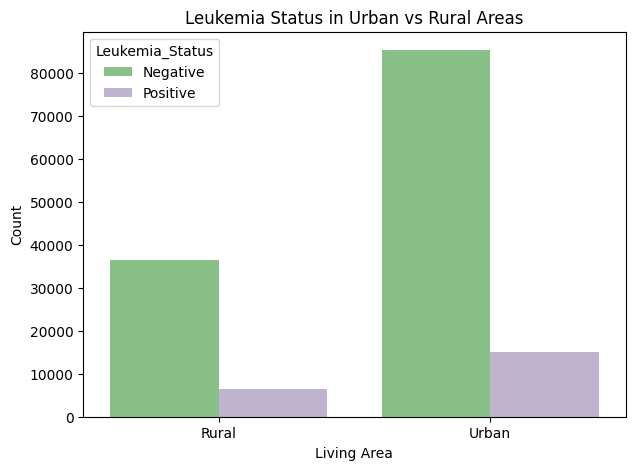

In [45]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Urban_Rural', hue='Leukemia_Status', data=df, palette='Accent')
plt.title('Leukemia Status in Urban vs Rural Areas')
plt.xlabel('Living Area')
plt.ylabel('Count')
plt.show()